<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Correlation**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis (EDA). You will examine the distribution of the data, identify outliers, and determine the correlation between different columns in the dataset.


## Objectives


In this lab, you will perform the following:


- Identify the distribution of compensation data in the dataset.

- Remove outliers to refine the dataset.

- Identify correlations between various features in the dataset.


## Hands on Lab


##### Step 1: Install and Import Required Libraries


In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2: Load the Dataset


In [2]:
# Load the dataset from the given URL
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_url)
pd.set_option('display.max_columns', None)

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 3: Analyze and Visualize Compensation Distribution</h3>


**Task**: Plot the distribution and histogram for `ConvertedCompYearly` to examine the spread of yearly compensation among respondents.


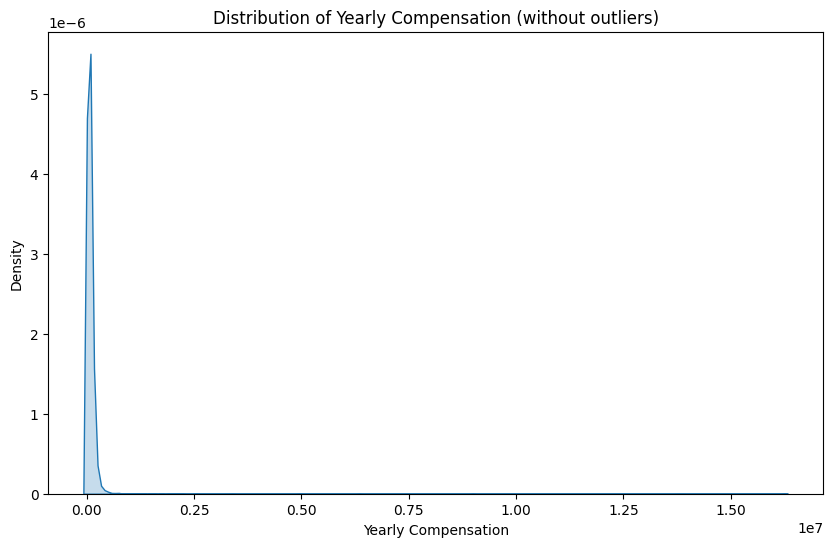

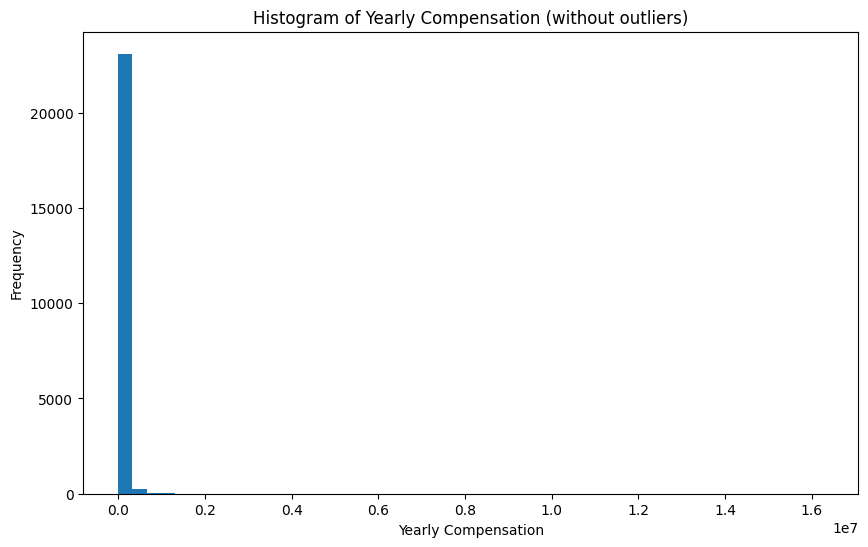

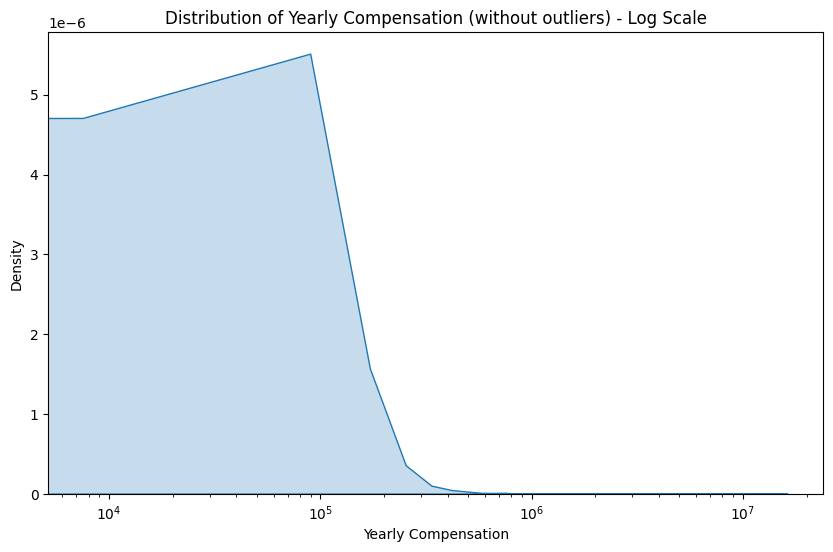

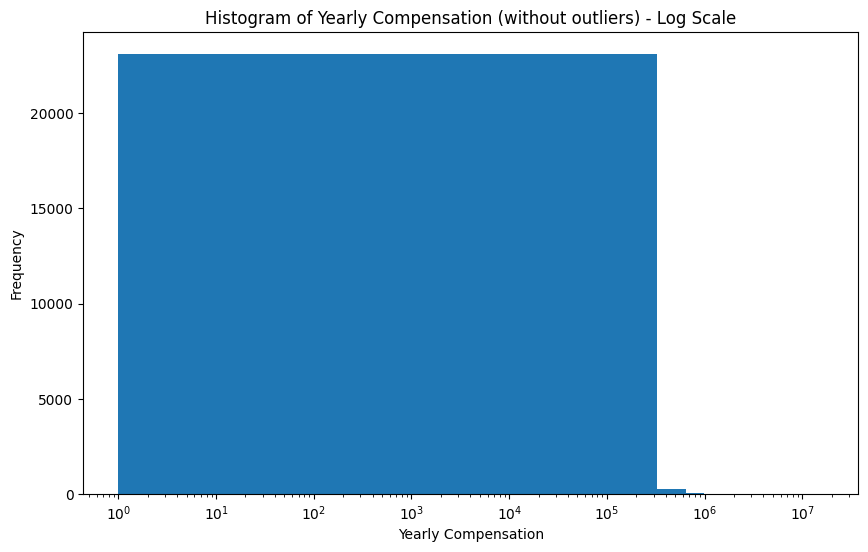

In [3]:
## Write your code here
df['ConvertedCompYearly'].isnull().sum()

In [ ]:
df_comp=df.dropna(subset='ConvertedCompYearly')


In [ ]:
# Calculating Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df_comp['ConvertedCompYearly'].quantile(0.25)
Q3 = df_comp['ConvertedCompYearly'].quantile(0.75)

# Calculating IQR
IQR = Q3 - Q1

# Defining the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying outliers
outliers = df_comp[(df_comp['ConvertedCompYearly'] < lower_bound) | (df_comp['ConvertedCompYearly'] > upper_bound)]
df_no_outliers = df_comp[(df_comp['ConvertedCompYearly'] >= lower_bound) & (df_comp['ConvertedCompYearly'] <= upper_bound)]
import numpy as np
plt.figure(figsize=(12, 6))
sns.histplot(df_no_outliers['ConvertedCompYearly'], bins=30, kde=True)
plt.title('Distribution of Yearly Compensation')
plt.xlabel('Converted Compensation Yearly')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

<h3>Step 4: Calculate Median Compensation for Full-Time Employees</h3>


**Task**: Filter the data to calculate the median compensation for respondents whose employment status is "Employed, full-time."


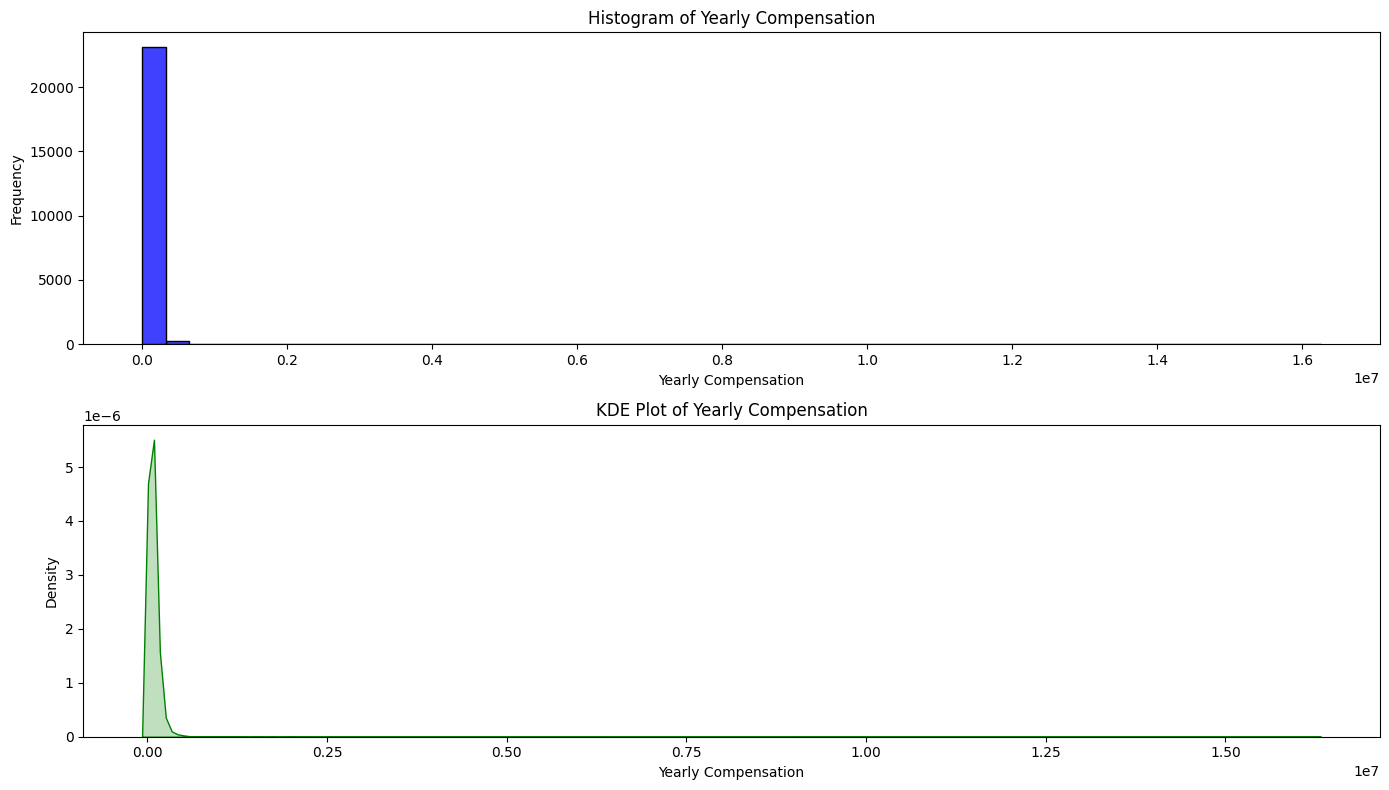

In [4]:
## Write your code here
df_no_outliers['Employment'].isnull().sum()

In [ ]:
df_no_outliers['ConvertedCompYearly'].median()

In [ ]:
full_time_employees = df_no_outliers[df_no_outliers['Employment'].str.contains('Employed, full-time', na=False)]
median_comp_full_time = full_time_employees['ConvertedCompYearly'].median()
median_comp_full_time

<h3>Step 5: Analyzing Compensation Range and Distribution by Country</h3>


Explore the range of compensation in the ConvertedCompYearly column by analyzing differences across countries. Use box plots to compare the compensation distributions for each country to identify variations and anomalies within each region, providing insights into global compensation trends.



In [5]:
## Write your code here
df_no_outliers['Country'].isnull().sum()

Median compensation for full-time employees: 69814.0


In [ ]:
df_no_outliers = df_no_outliers.copy()
df_no_outliers['Country_new'] = df_no_outliers['Country'].replace({"Iran, Islamic Republic of...": "Iran", 
                                                                   "Venezuela, Bolivarian Republic of...":"Venezuela",
                                                                   "Palestine":"Palestine, State of",
                                                                   "Republic of Korea" : "Korea, Republic of",
                                                                   "South Korea" : "Korea, Republic of",
                                                                   "North Korea" : "Korea, Democratic People's Republic of",
                                                                   "Hong Kong (S.A.R.)" : "Hong Kong",
                                                                   "Cape Verde" : "Cabo Verde",
                                                                   "Congo, Republic of the..." : "Congo",
                                                                   "Democratic Republic of the Congo" : "Congo, The Democratic Republic of the",
                                                                   "Swaziland" : "Eswatini",
                                                                   "Micronesia, Federated States of..." : "Micronesia, Federated States of",
                                                                   "Libyan Arab Jamahiriya" : "Libya"
                                                                  })
# Group by country and calculate statistics
compensation_by_country = df_no_outliers.groupby('Country_new')['ConvertedCompYearly'].agg(['mean', 'median', 'min', 'max', 'count']).reset_index()

# Rename columns for clarity
compensation_by_country.columns = ['Country', 'Mean Compensation', 'Median Compensation', 'Min Compensation', 'Max Compensation', 'Count']

# Sort by Median Compensation for better visualization
compensation_by_country = compensation_by_country.sort_values(by='Median Compensation', ascending=False)
compensation_by_country

In [ ]:
compensation_by_country.drop([30, 146, 13, 130])


In [ ]:
plt.figure(figsize=(15, 8))

# Create a box plot
sns.boxplot(x='Country', y='Mean Compensation', data=compensation_by_country)

# Rotate x labels for better readability
plt.xticks(rotation=45)

# Set the title and labels
plt.title('Box Plot of Yearly Compensation by Country')
plt.xlabel('Country')
plt.ylabel('Converted Compensation Yearly')

# Show the plot
plt.grid(True)
plt.show()

<h3>Step 6: Removing Outliers from the Dataset</h3>


**Task**: Create a new DataFrame by removing outliers from the `ConvertedCompYearly` column to get a refined dataset for correlation analysis.


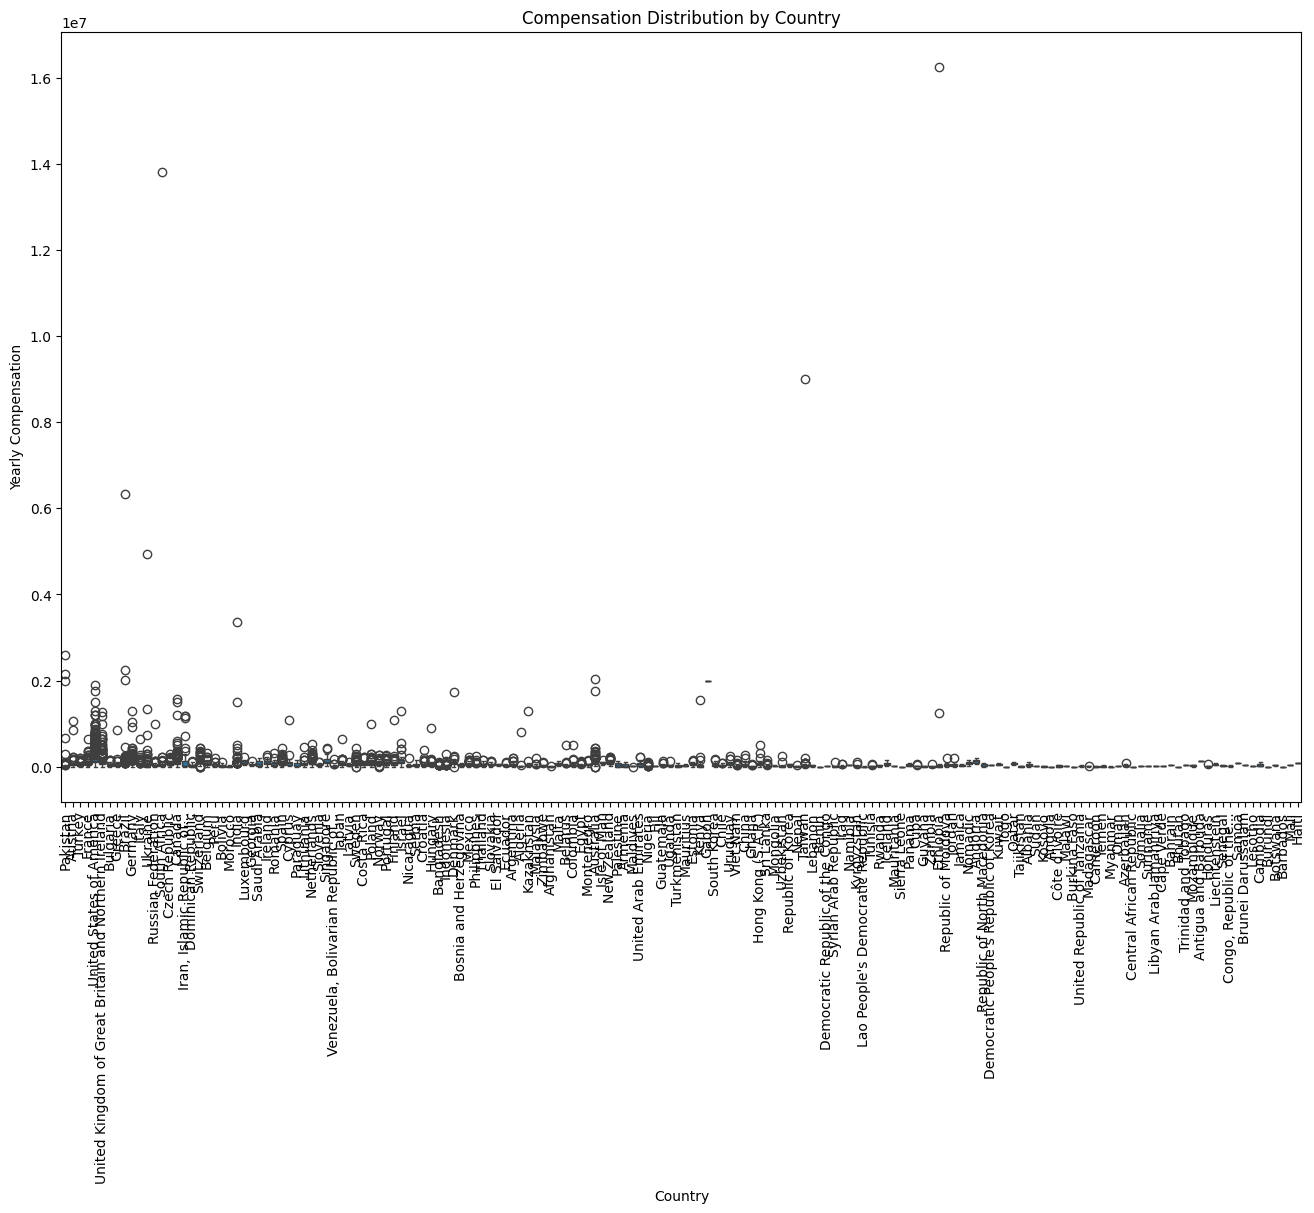

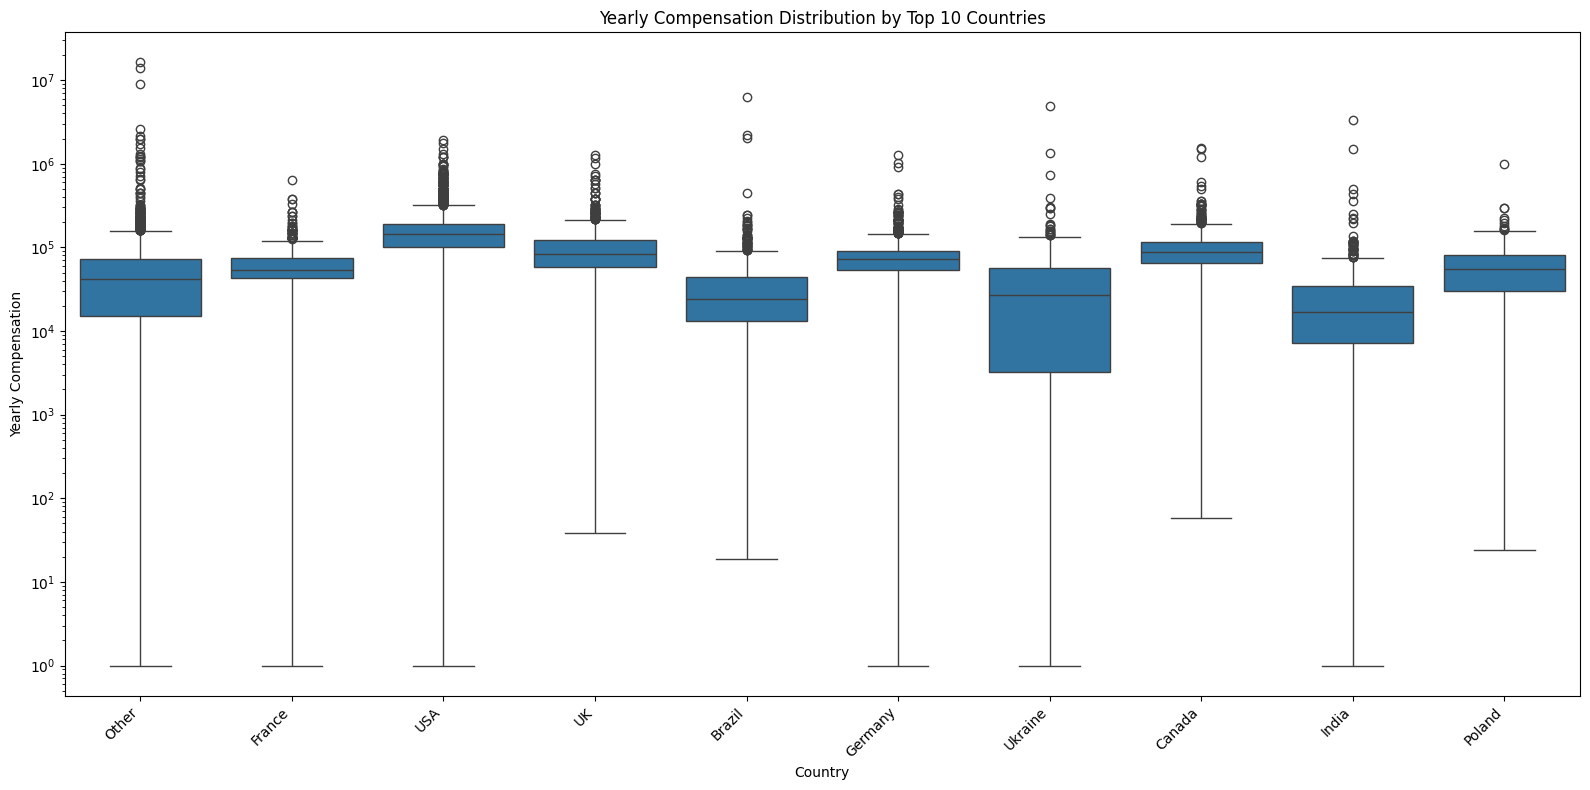

Original DataFrame size: (23435, 115)
New DataFrame size after removing outliers: (22457, 115)


In [9]:
## Write your code here
df_no_outliers

<h3>Step 7: Finding Correlations Between Key Variables</h3>


**Task**: Calculate correlations between `ConvertedCompYearly`, `WorkExp`, and `JobSatPoints_1`. Visualize these correlations with a heatmap.


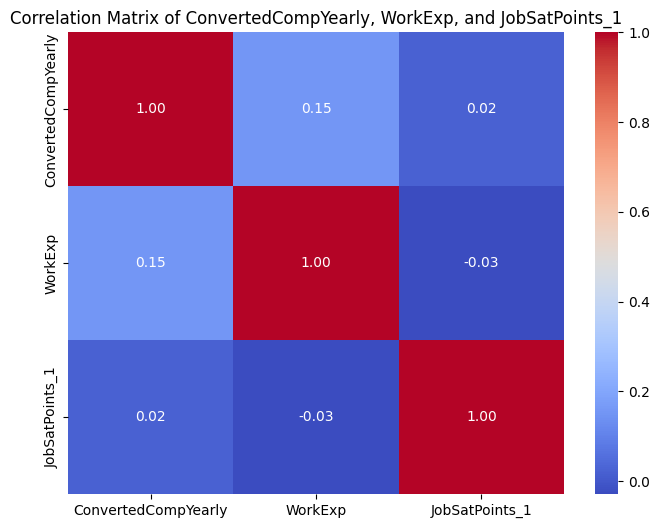

                     ConvertedCompYearly   WorkExp  JobSatPoints_1
ConvertedCompYearly             1.000000  0.153182        0.020156
WorkExp                         0.153182  1.000000       -0.028839
JobSatPoints_1                  0.020156 -0.028839        1.000000


In [10]:
## Write your code here
df_no_outliers['WorkExp'].isnull().sum()

<h3>Step 8: Scatter Plot for Correlations</h3>


**Task**: Create scatter plots to examine specific correlations between `ConvertedCompYearly` and `WorkExp`, as well as between `ConvertedCompYearly` and `JobSatPoints_1`.


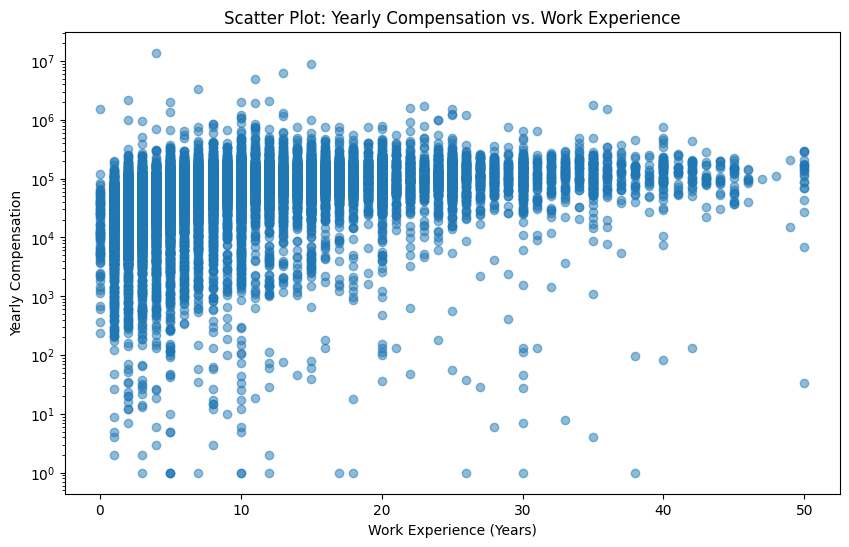

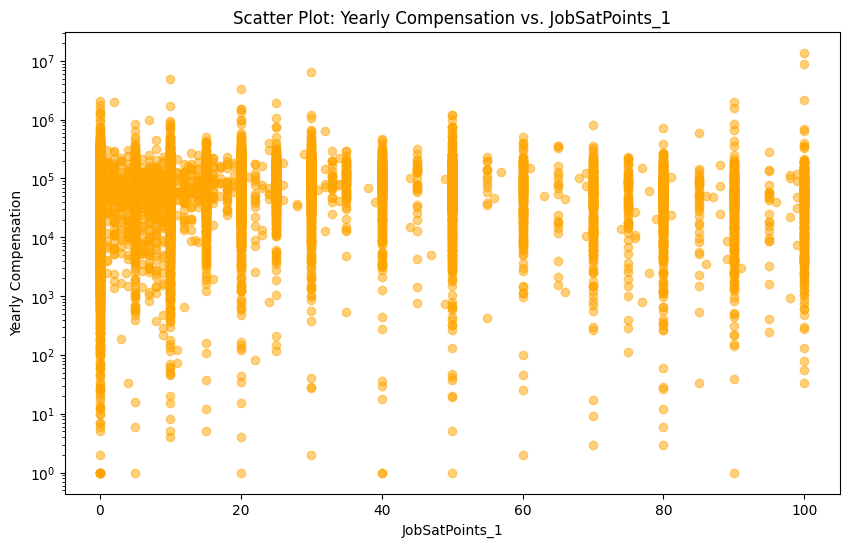

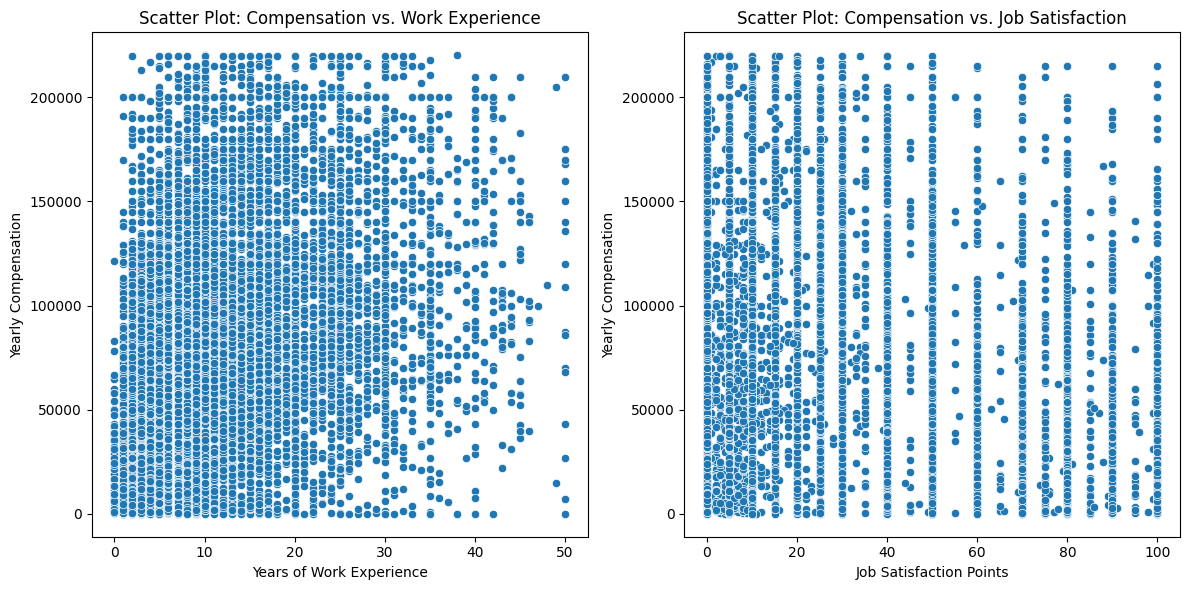

In [11]:
## Write your code here
# Scatter plot: ConvertedCompYearly vs. WorkExp
plt.figure(figsize=(10, 6))
plt.scatter(df['WorkExp'], df['ConvertedCompYearly'], alpha=0.5)  # alpha for transparency
plt.title('Scatter Plot: Yearly Compensation vs. Work Experience')
plt.xlabel('Work Experience (Years)')
plt.ylabel('Yearly Compensation')
plt.yscale('log') # Use log scale for better visualization
plt.show()

# Scatter plot: ConvertedCompYearly vs. JobSatPoints_1
plt.figure(figsize=(10, 6))
plt.scatter(df['JobSatPoints_1'], df['ConvertedCompYearly'], alpha=0.5, color='orange')  # alpha for transparency, different color
plt.title('Scatter Plot: Yearly Compensation vs. JobSatPoints_1')
plt.xlabel('JobSatPoints_1')
plt.ylabel('Yearly Compensation')
plt.yscale('log') # Use log scale for better visualization
plt.show()

# Scatter plot for ConvertedCompYearly vs WorkExp
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df_no_outliers, x='WorkExp', y='ConvertedCompYearly')
plt.xlabel('Years of Work Experience')
plt.ylabel('Yearly Compensation')
plt.title('Scatter Plot: Compensation vs. Work Experience')

# Scatter plot for ConvertedCompYearly vs JobSatPoints_1
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_no_outliers, x='JobSatPoints_1', y='ConvertedCompYearly')
plt.xlabel('Job Satisfaction Points')
plt.ylabel('Yearly Compensation')
plt.title('Scatter Plot: Compensation vs. Job Satisfaction')

plt.tight_layout()
plt.show()

<h3>Summary</h3>


In this lab, you practiced essential skills in correlation analysis by:

- Examining the distribution of yearly compensation with histograms and box plots.
- Detecting and removing outliers from compensation data.
- Calculating correlations between key variables such as compensation, work experience, and job satisfaction.
- Visualizing relationships with scatter plots and heatmaps to gain insights into the associations between these features.

By following these steps, you have developed a solid foundation for analyzing relationships within the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
